In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itables import show
import pprint

import itertools
from multiprocess import Pool
import multiprocess
from multiprocess import Manager
from threading import Thread

import os
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map  # or thread_map
import numpy as np
from scipy.interpolate import interp1d
# from scipy.optimize import UnivariateSpline
from scipy.interpolate import interp1d, UnivariateSpline
import matplotlib.pyplot as plt
from astropy.io import fits
from FitsClass import FITSFile as myfits
from ObservationClass import ObservationManager as obsm

import specs as specs
obs = obsm()

# Observation Class

## fits files organization

Given a folder with fits files, the class can look through all of them and classify them into their different stars, epoches taken and their corrsponding band.
It is also possible to set a backup folder, but it defaults to open 'Buckups' at the level of this notebook.

In [2]:
# First loading the obsm class
data_dir = './Data' # Default value
backup_dir = './Backups' # Default value
specs_filepath = './specs.py' # Default value
obs = obsm(data_dir = data_dir, backup_dir = backup_dir, specs_filepath = specs_filepath)

# Now simply run this method:
fits_directory = '../Raw' # The folder with the fits fils
output_directory = None # where I want it to organize the files
# obs.organize_star_files(fits_directory=fits_directory, output_directory=output_directory)

Now we can update the specs file like so

In [8]:
# Get the field we wanna add to specs
dict_obs = obs.get_observation_dict() # a dictionary which is essencially the paths to the fits files

# Now we choose the variable name and place the varible and it updates. 
# if it exists than a backup will be made under 'Backups' and the file will keep the old variable along with the new. 
# if not than it simply adds it
obs.update_specs_file('obs_file_names', dict_obs)
# obs.update_specs_file('variable_name', dict_obs)

Backup created: ./Backups/specs_2.bak
./specs.py updated successfully.


## Creating a table which summarises the values inside fits files

It is possible to pass a list of stars, epochs and band if you dont wanna see all of their attributes.
The most imporant thing is passing a list of the attributes you wanna see.
The list of attributes available can be seen using a fits_file method which is shown down below.

In [3]:
print(specs.star_names)

['Brey  70', 'Brey  83', 'HD  38029', 'HD  37248', 'Brey  95a', 'MNM2014 LMC195-1', 'HD  32125', 'HD  37026', 'HD 269818', 'HD  38448', 'HD  38030', 'HD  37680', 'Brey  58a', 'HD  32228', 'HD  32257', 'HD 269888', 'HD  36156', 'H2013 LMCe  584', 'L72 LH  41-1042', 'RMC 140', 'HD  32402', 'Brey  70a', 'Brey  16a', 'Brey  93', 'Brey  90a', 'HD 269891']


In [3]:
star_names = specs.star_names
stars = [star_names[-8], star_names[-9]]
bands = ['NIR','VIS','UVB']
attributes_list = ['OBJECT','DISPELEM','MJD-OBS','INSTRUME','DATE'] # Some exmaples
obs.create_observation_table_for_stars(stars=stars, band_list = bands, attributes_list= attributes_list)

BAT99 identifier not found. The indexes were: -1 and 39. It found sion="1.0" encoding="UTF-8" ?>


,File Name,OBJECT,Band,MJD-OBS,INSTRUME,DATE
0,ADP.2021-01-11T12_13_25.974.fits,H2013 LMCe 584,NIR,59187.335150,XSHOOTER,2021-01-08T10:20:35
1,ADP.2021-01-11T12_13_26.069.fits,H2013 LMCe 584,UVB,59187.335057,XSHOOTER,2021-01-08T10:19:35
2,ADP.2021-01-11T12_13_26.123.fits,H2013 LMCe 584,VIS,59187.335117,XSHOOTER,2021-01-08T10:26:21
3,ADP.2021-01-11T12_54_49.790.fits,L72 LH 41-1042,NIR,59205.152661,XSHOOTER,2021-01-08T16:29:52
4,ADP.2021-01-11T12_54_49.690.fits,L72 LH 41-1042,UVB,59205.152564,XSHOOTER,2021-01-08T16:28:38
5,ADP.2021-01-11T12_54_49.731.fits,L72 LH 41-1042,VIS,59205.152624,XSHOOTER,2021-01-08T16:35:41
6,ADP.2021-04-22T19_37_54.054.fits,H2013 LMCe 584,NIR,59311.999891,XSHOOTER,2021-04-13T07:39:09
7,ADP.2021-04-22T19_37_53.844.fits,H2013 LMCe 584,UVB,59311.999794,XSHOOTER,2021-04-13T07:37:56
8,ADP.2021-04-22T19_37_53.860.fits,H2013 LMCe 584,VIS,59311.999855,XSHOOTER,2021-04-13T07:44:54
9,ADP.2021-05-10T09_27_27.941.fits,L72 LH 41-1042,NIR,59334.024715,XSHOOTER,2021-05-07T09:29:27


# Star Class 

Before doing various star related stuff, we need to open a star instance. 
It is done by using its name and from the obsm.

In [2]:
# All the star names are found in specs.py file
star_names = specs.star_names
print(star_names)

# To work on 'Brey 70' we load the first name
star_name = star_names[9]
print(f'We will work on star {star_name}')

# Loading is done using osm
obs = obsm()
star = obs.load_star_instance(star_name = star_name)

['Brey  70', 'Brey  83', 'HD  38029', 'HD  37248', 'Brey  95a', 'MNM2014 LMC195-1', 'HD  32125', 'HD  37026', 'HD 269818', 'HD  38448', 'HD  38030', 'HD  37680', 'Brey  58a', 'HD  32228', 'HD  32257', 'HD 269888', 'HD  36156', 'H2013 LMCe  584', 'RMC 140', 'HD  32402', 'Brey  70a', 'Brey  16a', 'Brey  93', 'Brey  90a', 'HD 269891']
We will work on star HD  38448


## Exploring which data we have saved of each spectra

Every star has multiple epochs and bands within epoch, so when working a spesific observation we need to specify the epoch number and band.
To see all the avaiable epochs and bands of a star we can use the method that shows what properties we saved for the star:

In [3]:
star.list_available_properties()


Available properties for star 'Brey  70':

Epoch      Band       Property                                 Type       Details        
-----------------------------------------------------------------------------------------
1          .ipynb_checkpoints (No output directory)                                              
1          COMBINED   (No output directory)                                              
1          NIR        norm.npz                                 File                      
1          NIR        norm_anchors_results.npz                 File                      
1          UVB        Figures                                  Folder     2 files        
1          UVB        norm_anchors_results.npz                 File                      
1          VIS        norm_anchors_results.npz                 File                      
2          COMBINED   (No output directory)                                              
2          NIR        norm_anchors_results.npz  

## Loading a property

In [16]:
property_name = 'norm_anchors_results'
epoch_num = 1
band = 'NIR'
data = star.load_property(property_name= property_name,epoch_number=epoch_num, band = band)
print(data)

Tried ./Data/Brey  70/epoch1/NIR/output/norm_anchors_results.npz
{'selected_wavelengths': array([ 995.25, 1043.49, 1068.33, 1176.33, 1223.49, 1519.77, 1768.17,
       1984.89, 2034.93, 2216.01, 2370.81, 2468.01]), 'normalized_flux': array([0.        , 1.12963012, 0.65118962, ..., 0.4533152 , 0.23902796,
       0.        ]), 'interpolated_flux': array([8.35859047e-16, 8.35859047e-16, 8.35859047e-16, ...,
       5.04044773e-17, 5.04044773e-17, 5.04044773e-17])}


## Saving a property

In [19]:
epoch_num = 1
band = 'NIR'
random_num = 16
exmaple_data = star.test_method(epoch_num,band,random_num)
star.save_property(file_name='exmaple',property_data = exmaple_data, epoch_number = epoch_num, band = band,overwrite = True, backup = False)
# you can check that its now seen by doing star.list_available_properties() done earlier

TypeError: numpy.savez() argument after ** must be a mapping, not numpy.ndarray

## Deleting a property

In [1]:
epoch_num = 1
band = 'NIR'
random_num = 16
# exmaple_data = star.test_method(epoch_num,band,random_num)
band = ['UVB','VIS','NIR']
# Notice that now we have delete_all_in_folder, if property is saved in a folder, cuz it has multiple saved files, we can turn it on and it will delete all
star.delete_files(property_to_delete='clean_flux', epoch_numbers = None, bands = band, delete_all=True, delete_all_in_folder = False)
# you can check that its now DELETED by using star.list_available_properties() done earlier

NameError: name 'star' is not defined

In [2]:
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    # star.delete_files(property_to_delete='RVs',)

property_path is Data/Brey  70/epoch1/COMBINED/output/RVs.npz
Backup created at Backups/deleted/Brey  70/epoch1/COMBINED/RVs_backup_22_05_2025__17_46_47.npz
Error deleting file 'Data/Brey  70/epoch1/COMBINED/output/RVs.npz': [Errno 2] No such file or directory: 'Data/Brey  70/epoch1/COMBINED/output/RVs.npz'
property_path is Data/Brey  70/epoch1/COMBINED2/output/RVs.npz
Error: No file or folder matching 'RVs' found in 'Data/Brey  70/epoch1/COMBINED2/output' for star 'Brey  70', epoch '1', band 'COMBINED2'.
property_path is Data/Brey  70/epoch1/NIR/output/RVs.npz
Error: No file or folder matching 'RVs' found in 'Data/Brey  70/epoch1/NIR/output' for star 'Brey  70', epoch '1', band 'NIR'.
property_path is Data/Brey  70/epoch1/UVB/output/RVs.npz
Error: No file or folder matching 'RVs' found in 'Data/Brey  70/epoch1/UVB/output' for star 'Brey  70', epoch '1', band 'UVB'.
property_path is Data/Brey  70/epoch1/VIS/output/RVs.npz
Error: No file or folder matching 'RVs' found in 'Data/Brey  70/

In [4]:
skip_epochs = {'HD  38029': [6],'Brey  95a': [5,6],'Brey  83': [5,6]}
for star_name in skip_epochs.keys():
    star = obs.load_star_instance(star_name)
    star.delete_files(epoch_numbers=skip_epochs[star_name],bands='COMBINED',property_to_delete='RVs')

property_path is Data/HD  38029/epoch6/COMBINED/output/RVs.npz
Backup created at Backups/deleted/HD  38029/epoch6/COMBINED/RVs_backup_09_07_2025__16_45_40.npz
Error deleting file 'Data/HD  38029/epoch6/COMBINED/output/RVs.npz': [Errno 2] No such file or directory: 'Data/HD  38029/epoch6/COMBINED/output/RVs.npz'
property_path is Data/Brey  95a/epoch5/COMBINED/output/RVs.npz
Backup created at Backups/deleted/Brey  95a/epoch5/COMBINED/RVs_backup_09_07_2025__16_45_40.npz
Error deleting file 'Data/Brey  95a/epoch5/COMBINED/output/RVs.npz': [Errno 2] No such file or directory: 'Data/Brey  95a/epoch5/COMBINED/output/RVs.npz'
property_path is Data/Brey  95a/epoch6/COMBINED/output/RVs.npz
Backup created at Backups/deleted/Brey  95a/epoch6/COMBINED/RVs_backup_09_07_2025__16_45_40.npz
Error deleting file 'Data/Brey  95a/epoch6/COMBINED/output/RVs.npz': [Errno 2] No such file or directory: 'Data/Brey  95a/epoch6/COMBINED/output/RVs.npz'
property_path is Data/Brey  83/epoch5/COMBINED/output/RVs.npz

## Restoring from backup

## Running methods while saving, overwriting, backing up, and choosing between multiprocess or iterations

## Getting the BAT99 name of the stars (requies interent since its being pulled from simabd) 

In [5]:
# obs = obsm()
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    print(f'{star_name} is BAT {star.BAT_ID}')

Brey  70 is BAT 87
Brey  83 is BAT 115
HD  38029 is BAT 85
HD  37248 is BAT 53
Brey  95a is BAT 127
MNM2014 LMC195-1 is BAT None
HD  32125 is BAT 9
HD  37026 is BAT 52
HD 269818 is BAT 70
HD  38448 is BAT 125
HD  38030 is BAT 84
HD  37680 is BAT 61
Brey  58a is BAT 69
HD  32228 is BAT 10
HD  32257 is BAT 8
HD 269888 is BAT 90
HD  36156 is BAT 34
H2013 LMCe  584 is BAT None
L72 LH  41-1042 is BAT None
RMC 140 is BAT 101
HD  32402 is BAT 11
Brey  70a is BAT 88
Brey  16a is BAT 20
Brey  93 is BAT 123
Brey  90a is BAT 121
HD 269891 is BAT 92


## Plotting a Stars spectra (1 or more badn adn 1 or more epochs)

### ploting spectra

Data/HD 269891/epoch1/NIR/ADP.2020-11-13T13_47_10.394.fits
Data loaded from Data/HD 269891/epoch1/NIR/ADP.2020-11-13T13_47_10.394.fits


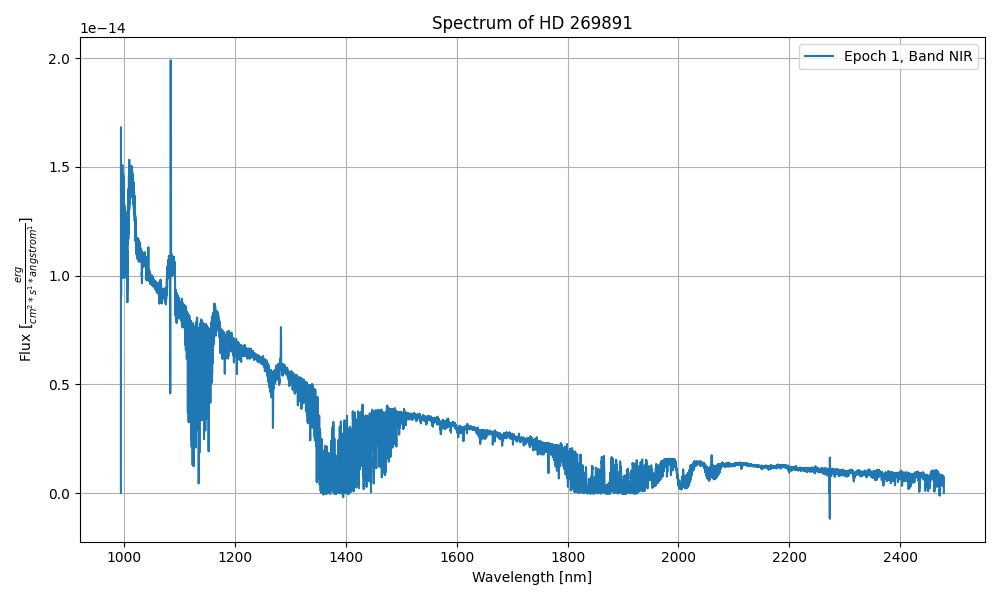

In [7]:
%matplotlib widget
# We can plot a single band from a single epoch and save it (though using the widget its simpler and better):
star.plot_spectra(epoch_nums=1, bands='NIR', save = False)

Data/HD 269891/epoch1/NIR/ADP.2020-11-13T13_47_10.394.fits
Data loaded from Data/HD 269891/epoch1/NIR/ADP.2020-11-13T13_47_10.394.fits
Data/HD 269891/epoch1/VIS/ADP.2020-11-13T13_47_10.442.fits
Data loaded from Data/HD 269891/epoch1/VIS/ADP.2020-11-13T13_47_10.442.fits
Data/HD 269891/epoch1/UVB/ADP.2020-11-13T13_47_10.402.fits
Data loaded from Data/HD 269891/epoch1/UVB/ADP.2020-11-13T13_47_10.402.fits
Data/HD 269891/epoch1/COMBINED/combined_bands.fits
Data loaded from Data/HD 269891/epoch1/COMBINED/combined_bands.fits


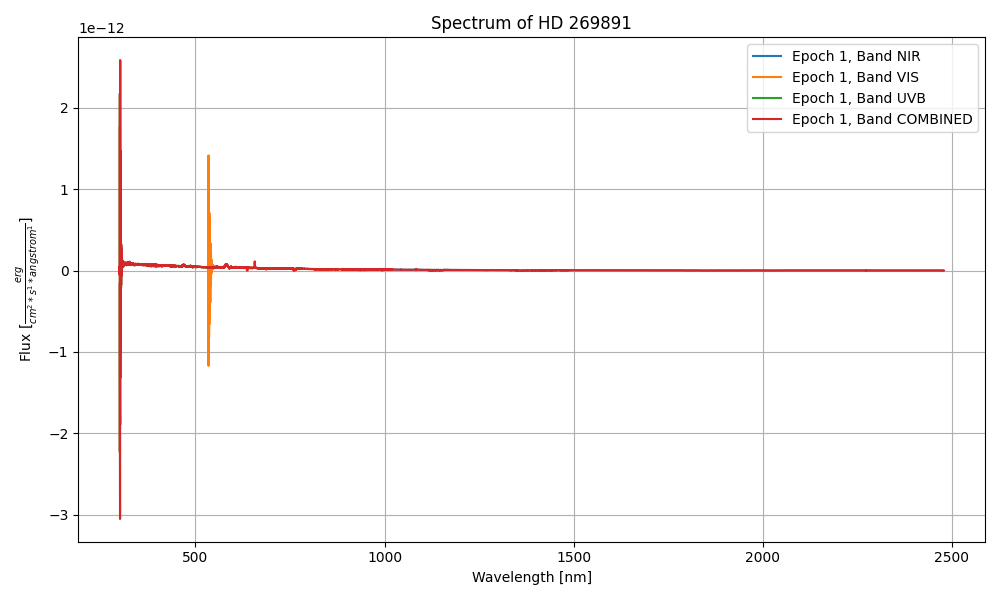

In [7]:
%matplotlib widget
# We can also plot bands and epochs together by passing a list:
epochs = [1,3,5]
epochs = [1]
# bands = ['NIR', 'UVB'] 
star.plot_spectra(epoch_nums = epochs)

### ploting normalized spectra (if available)

./Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Data loaded from ./Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Tried ./Data/Brey  70/epoch1/UVB/output/norm_anchors_results.npz


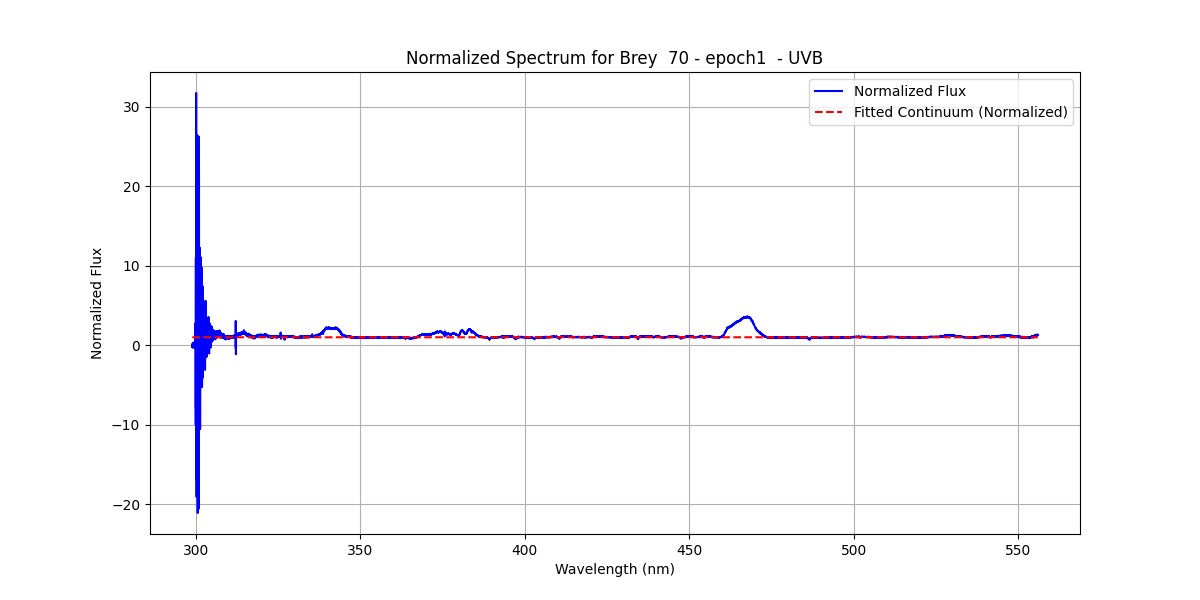

In [10]:
%matplotlib widget
epoch_num = 1
band = 'UVB'
star.plot_normalized_spectrum(epoch_num,band)

## Data extraction from a fits file

In [ ]:
# A fits file has a lot of data in it. An easy way to see which data it has is loading a fits file and printing its fields.
# First lets load an observation (a single fits file) by specifing its epoch number and band
obs = obsm()
star_name = 'Brey  90a'
star = obs.load_star_instance(star_name = star_name)

epoch_num = 6
band = 'NIR'
fits_file = star.load_observation(epoch_num,band)
bary = fits_file.header['ESO QC VRAD BARYCOR']
print(bary)
# print(data['HIERARCH'])
# print(data)
# for key in data.keys():
#     print(key)

# Now prints its values
fits_file.print_file_info()

In [11]:
# Now say wanna see the SNR of the file:
SNR = fits_file.data['SNR'][0] # For some weird reason the data is a list within a single item list (A 1XN matrix) so we take the first (and only) iten
print(SNR)

[ 0.          0.2402389   0.50928232 ...  8.44405574 10.48350455
  8.68299689]


### creating raw data table

In [11]:
star_name = specs.star_names[24]
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    
    attributes_list = ['OBJECT','DISPELEM','RA','DEC','MJD-OBS','MJD-END','ESO QC VRAD BARYCOR']
    epochs = star.get_all_epoch_numbers()
    star.create_observation_table(epoch_list=epochs,band_list=['NIR','VIS','UVB'],attributes_list=attributes_list,print_table=True)

,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_19_45.726.fits,Brey 70,NIR,84.370347,-69.34535,59150.345266,59150.350377,-1.841524
1,ADP.2020-11-13T13_19_45.649.fits,Brey 70,UVB,84.370347,-69.34535,59150.345169,59150.350168,-1.841405
2,ADP.2020-11-13T13_19_45.412.fits,Brey 70,VIS,84.370347,-69.34535,59150.345229,59150.350355,-1.841470
3,ADP.2020-12-07T08_55_14.173.fits,Brey 70,NIR,84.369324,-69.34563,59170.209676,59170.214802,-1.652729
4,ADP.2020-12-07T08_55_14.124.fits,Brey 70,UVB,84.369324,-69.34563,59170.209580,59170.214586,-1.652620
5,ADP.2020-12-07T08_55_14.279.fits,Brey 70,VIS,84.369324,-69.34563,59170.209641,59170.214778,-1.652679
6,ADP.2021-09-01T08_13_28.027.fits,Brey 70,NIR,84.369189,-69.34613,59448.337827,59448.342975,-0.640733
7,ADP.2021-09-01T08_13_27.941.fits,Brey 70,UVB,84.369189,-69.34613,59448.337731,59448.342768,-0.640680
8,ADP.2021-09-01T08_13_27.907.fits,Brey 70,VIS,84.369189,-69.34613,59448.337791,59448.342956,-0.640707
9,ADP.2021-09-20T19_54_27.938.fits,Brey 70,NIR,84.368564,-69.34623,59461.391329,59461.396478,-1.038604


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_19_45.746.fits,Brey 83,NIR,84.683167,-69.09795,59150.267011,59150.276620,-1.632680
1,ADP.2020-11-13T13_19_45.578.fits,Brey 83,UVB,84.683167,-69.09795,59150.266918,59150.276477,-1.632578
2,ADP.2020-11-13T13_19_45.712.fits,Brey 83,VIS,84.683167,-69.09795,59150.266979,59150.276237,-1.632629
3,ADP.2020-12-07T08_55_14.103.fits,Brey 83,NIR,84.683156,-69.09793,59170.192514,59170.202108,-1.522830
4,ADP.2020-12-07T08_55_14.322.fits,Brey 83,UVB,84.683156,-69.09793,59170.192417,59170.201966,-1.522735
5,ADP.2020-12-07T08_55_14.098.fits,Brey 83,VIS,84.683156,-69.09793,59170.192478,59170.201726,-1.522782
6,ADP.2021-09-01T08_15_43.007.fits,Brey 83,NIR,84.682840,-69.09768,59449.365482,59449.375075,-0.588757
7,ADP.2021-09-01T08_15_43.003.fits,Brey 83,UVB,84.682840,-69.09768,59449.365386,59449.374936,-0.588686
8,ADP.2021-09-01T08_15_42.945.fits,Brey 83,VIS,84.682840,-69.09768,59449.365446,59449.374695,-0.588722
9,ADP.2021-09-20T20_13_53.767.fits,Brey 83,NIR,84.682612,-69.09787,59467.328768,59467.338393,-1.022882


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_47_10.154.fits,HD 38029,NIR,84.231102,-69.19335,59153.269082,59153.270743,-1.735375
1,ADP.2020-11-13T13_47_10.248.fits,HD 38029,UVB,84.231102,-69.19335,59153.268983,59153.270599,-1.735261
2,ADP.2020-11-13T13_47_10.317.fits,HD 38029,VIS,84.231102,-69.19335,59153.269044,59153.270474,-1.735313
3,ADP.2020-12-15T14_35_31.118.fits,HD 38029,NIR,84.231337,-69.19299,59169.350517,59169.352178,-1.771641
4,ADP.2020-12-15T14_35_31.147.fits,HD 38029,UVB,84.231337,-69.19299,59169.350419,59169.352040,-1.771545
5,ADP.2020-12-15T14_35_31.257.fits,HD 38029,VIS,84.231337,-69.19299,59169.350479,59169.351915,-1.771593
6,ADP.2021-05-14T07_55_30.625.fits,HD 38029,NIR,84.230141,-69.19304,59337.032770,59337.034393,1.601465
7,ADP.2021-05-14T07_55_30.337.fits,HD 38029,UVB,84.230141,-69.19304,59337.032673,59337.034253,1.601487
8,ADP.2021-05-14T07_55_30.564.fits,HD 38029,VIS,84.230141,-69.19304,59337.032733,59337.034128,1.601476
9,ADP.2021-08-04T12_51_37.612.fits,HD 38029,NIR,84.232032,-69.19311,59412.418379,59412.419963,0.490047


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T12_56_21.778.fits,HD 37248,NIR,82.659282,-71.02956,59147.339364,59147.342631,-2.702282
1,ADP.2020-11-13T12_56_21.661.fits,HD 37248,UVB,82.659282,-71.02956,59147.339267,59147.342490,-2.702182
2,ADP.2020-11-13T12_56_21.471.fits,HD 37248,VIS,82.659282,-71.02956,59147.339327,59147.342249,-2.702232
3,ADP.2020-12-15T14_15_07.152.fits,HD 37248,NIR,82.657829,-71.03035,59155.144507,59155.147743,-2.517643
4,ADP.2020-12-15T14_15_07.164.fits,HD 37248,UVB,82.657829,-71.03035,59155.144411,59155.147605,-2.517588
5,ADP.2020-12-15T14_15_07.172.fits,HD 37248,VIS,82.657829,-71.03035,59155.144471,59155.147365,-2.517618
6,ADP.2021-08-04T13_20_13.063.fits,HD 37248,NIR,82.658012,-71.03022,59420.379248,59420.382476,-0.128436
7,ADP.2021-08-04T13_20_12.977.fits,HD 37248,UVB,82.658012,-71.03022,59420.379157,59420.382338,-0.128403
8,ADP.2021-08-04T13_20_12.989.fits,HD 37248,VIS,82.658012,-71.03022,59420.379217,59420.382098,-0.128420
9,ADP.2021-08-12T20_02_21.222.fits,HD 37248,NIR,82.658401,-71.02996,59432.411107,59432.414367,-0.683958


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-12-15T14_15_07.451.fits,Brey 95a,NIR,85.055115,-69.40021,59155.162124,59155.165923,-1.621739
1,ADP.2020-12-15T14_15_07.109.fits,Brey 95a,UVB,85.055115,-69.40021,59155.162027,59155.165782,-1.621671
2,ADP.2020-12-15T14_15_07.040.fits,Brey 95a,VIS,85.055115,-69.40021,59155.162087,59155.165542,-1.621708
3,ADP.2021-01-11T12_13_26.141.fits,Brey 95a,NIR,85.056374,-69.40090,59187.179408,59187.183261,-1.279591
4,ADP.2021-01-11T12_13_26.251.fits,Brey 95a,UVB,85.056374,-69.40090,59187.179311,59187.183123,-1.279479
5,ADP.2021-01-11T12_13_26.106.fits,Brey 95a,VIS,85.056374,-69.40090,59187.179371,59187.182882,-1.279530
6,ADP.2021-09-01T08_15_43.077.fits,Brey 95a,NIR,85.055396,-69.40047,59449.392113,59449.395919,-0.776982
7,ADP.2021-09-01T08_15_42.920.fits,Brey 95a,UVB,85.055396,-69.40047,59449.392016,59449.395782,-0.776899
8,ADP.2021-09-01T08_15_43.024.fits,Brey 95a,VIS,85.055396,-69.40047,59449.392076,59449.395541,-0.776941
9,ADP.2021-10-05T08_02_37.974.fits,Brey 95a,NIR,85.053726,-69.40059,59483.378007,59483.381837,-1.533610


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T12_39_59.177.fits,MNM2014 LMC195-1,NIR,79.542981,-69.21621,59145.345409,59145.355041,-2.343539
1,ADP.2020-11-13T12_39_59.173.fits,MNM2014 LMC195-1,UVB,79.542981,-69.21621,59145.345314,59145.354352,-2.343418
2,ADP.2020-11-13T12_39_59.237.fits,MNM2014 LMC195-1,VIS,79.542981,-69.21621,59145.345374,59145.353324,-2.343484
3,ADP.2020-12-07T08_43_18.807.fits,MNM2014 LMC195-1,NIR,79.543409,-69.21617,59162.331126,59162.340758,-2.527022
4,ADP.2020-12-07T08_43_18.863.fits,MNM2014 LMC195-1,UVB,79.543409,-69.21617,59162.331030,59162.340070,-2.526918
5,ADP.2020-12-07T08_43_18.792.fits,MNM2014 LMC195-1,VIS,79.543409,-69.21617,59162.331089,59162.339042,-2.526970
6,ADP.2021-04-22T19_45_31.396.fits,MNM2014 LMC195-1,NIR,79.553273,-69.21808,59315.004923,59315.014594,1.990627
7,ADP.2021-04-22T19_45_31.275.fits,MNM2014 LMC195-1,UVB,79.553273,-69.21808,59315.004826,59315.013912,1.990693
8,ADP.2021-04-22T19_45_31.423.fits,MNM2014 LMC195-1,VIS,79.553273,-69.21808,59315.004887,59315.012884,1.990660
9,ADP.2021-09-20T19_54_27.947.fits,MNM2014 LMC195-1,NIR,79.541783,-69.21654,59461.376827,59461.386467,-0.822663


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-12-15T08_50_15.779.fits,HD 32125,NIR,74.044854,-66.29239,59136.140906,59136.149327,-1.349958
1,ADP.2020-12-15T08_50_15.458.fits,HD 32125,UVB,74.044854,-66.29239,59136.140814,59136.149187,-1.349908
2,ADP.2020-12-15T08_50_15.534.fits,HD 32125,VIS,74.044854,-66.29239,59136.140875,59136.148947,-1.349936
3,ADP.2020-11-13T13_19_45.722.fits,HD 32125,NIR,74.046057,-66.29146,59150.317858,59150.326371,-2.209715
4,ADP.2020-11-13T13_19_45.762.fits,HD 32125,UVB,74.046057,-66.29146,59150.317759,59150.326231,-2.209576
5,ADP.2020-11-13T13_19_45.478.fits,HD 32125,VIS,74.046057,-66.29146,59150.317819,59150.325990,-2.209640
6,ADP.2020-12-07T08_37_52.954.fits,HD 32125,NIR,74.046384,-66.29142,59160.315165,59160.323609,-2.639565
7,ADP.2020-12-07T08_37_52.978.fits,HD 32125,UVB,74.046384,-66.29142,59160.315071,59160.323468,-2.639442
8,ADP.2020-12-07T08_37_53.160.fits,HD 32125,VIS,74.046384,-66.29142,59160.315132,59160.323228,-2.639504
9,ADP.2021-04-22T19_45_31.309.fits,HD 32125,NIR,74.046756,-66.29179,59315.019577,59315.028059,1.258034


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_19_45.512.fits,HD 37026,NIR,82.548272,-67.43512,59150.309601,59150.312243,-1.309630
1,ADP.2020-11-13T13_19_45.675.fits,HD 37026,UVB,82.548273,-67.43512,59150.309508,59150.312104,-1.309499
2,ADP.2020-11-13T13_19_45.433.fits,HD 37026,VIS,82.548272,-67.43512,59150.309568,59150.311864,-1.309571
3,ADP.2020-12-07T09_01_07.469.fits,HD 37026,NIR,82.549409,-67.43500,59173.325246,59173.327879,-1.636552
4,ADP.2020-12-07T09_01_07.473.fits,HD 37026,UVB,82.549409,-67.43500,59173.325152,59173.327735,-1.636433
5,ADP.2020-12-07T09_01_07.347.fits,HD 37026,VIS,82.549409,-67.43500,59173.325213,59173.327495,-1.636498
6,ADP.2021-04-22T19_40_38.043.fits,HD 37026,NIR,82.551017,-67.43531,59313.087234,59313.089867,0.824250
7,ADP.2021-04-22T19_40_38.191.fits,HD 37026,UVB,82.551017,-67.43531,59313.087138,59313.089725,0.824277
8,ADP.2021-04-22T19_40_37.942.fits,HD 37026,VIS,82.551017,-67.43531,59313.087199,59313.089484,0.824263
9,ADP.2021-08-03T16_16_29.651.fits,HD 37026,NIR,82.547330,-67.43600,59406.413093,59406.415758,1.354441


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-12-15T15_37_30.481.fits,HD 269818,NIR,83.929279,-69.18157,59148.343729,59148.349835,-1.823086
1,ADP.2020-12-15T15_37_30.778.fits,HD 269818,UVB,83.929279,-69.18157,59148.343632,59148.349697,-1.822966
2,ADP.2020-12-15T15_37_30.672.fits,HD 269818,VIS,83.929279,-69.18157,59148.343693,59148.349457,-1.823021
3,ADP.2020-12-07T08_24_45.476.fits,HD 269818,NIR,83.929365,-69.18188,59156.135320,59156.141434,-1.680166
4,ADP.2020-12-07T08_24_45.565.fits,HD 269818,UVB,83.929365,-69.18188,59156.135228,59156.141291,-1.680116
5,ADP.2020-12-07T08_24_45.689.fits,HD 269818,VIS,83.929365,-69.18188,59156.135289,59156.141050,-1.680141
6,ADP.2021-09-01T08_09_18.413.fits,HD 269818,NIR,83.930303,-69.18149,59446.349312,59446.355425,-0.477300
7,ADP.2021-09-01T08_09_18.201.fits,HD 269818,UVB,83.930303,-69.18149,59446.349215,59446.355283,-0.477242
8,ADP.2021-09-01T08_09_18.285.fits,HD 269818,VIS,83.930303,-69.18149,59446.349276,59446.355042,-0.477271
9,ADP.2021-11-05T09_31_37.524.fits,HD 269818,NIR,83.930040,-69.18345,59510.166779,59510.172885,-1.663345


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2021-01-11T12_10_27.049.fits,HD 38448,NIR,84.981949,-69.40568,59186.052682,59186.055424,-1.227025
1,ADP.2021-01-11T12_10_27.306.fits,HD 38448,UVB,84.981949,-69.40568,59186.052587,59186.055328,-1.226975
2,ADP.2021-01-11T12_10_27.250.fits,HD 38448,VIS,84.981949,-69.40568,59186.052648,59186.055157,-1.226997
3,ADP.2021-01-11T12_13_26.161.fits,HD 38448,NIR,84.981994,-69.40569,59187.192205,59187.194954,-1.305108
4,ADP.2021-01-11T12_13_26.247.fits,HD 38448,UVB,84.981994,-69.40569,59187.192100,59187.194859,-1.304994
5,ADP.2021-01-11T12_13_26.091.fits,HD 38448,VIS,84.981994,-69.40569,59187.192166,59187.194688,-1.305046
6,ADP.2021-01-11T12_54_49.773.fits,HD 38448,NIR,84.983946,-69.40543,59205.144018,59205.146760,-0.872954
7,ADP.2021-01-11T12_54_49.745.fits,HD 38448,UVB,84.983946,-69.40543,59205.143924,59205.146665,-0.872851
8,ADP.2021-01-11T12_54_49.681.fits,HD 38448,VIS,84.983946,-69.40543,59205.143984,59205.146494,-0.872902
9,ADP.2021-09-01T08_15_42.972.fits,HD 38448,NIR,84.982271,-69.40650,59449.381931,59449.384696,-0.767453


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_47_10.209.fits,HD 38030,NIR,84.211111,-69.43161,59153.258587,59153.261816,-1.817985
1,ADP.2020-11-13T13_47_10.146.fits,HD 38030,UVB,84.211111,-69.43161,59153.258490,59153.261673,-1.817884
2,ADP.2020-11-13T13_47_10.355.fits,HD 38030,VIS,84.211111,-69.43161,59153.258551,59153.261432,-1.817934
3,ADP.2020-12-07T09_01_07.597.fits,HD 38030,NIR,84.212992,-69.43131,59173.332369,59173.335582,-1.779417
4,ADP.2020-12-07T09_01_07.434.fits,HD 38030,UVB,84.212992,-69.43131,59173.332278,59173.335440,-1.779320
5,ADP.2020-12-07T09_01_07.562.fits,HD 38030,VIS,84.212992,-69.43131,59173.332338,59173.335199,-1.779368
6,ADP.2021-06-01T10_33_37.849.fits,HD 38030,NIR,84.214669,-69.43160,59350.992911,59350.996163,1.575835
7,ADP.2021-06-01T10_33_37.908.fits,HD 38030,UVB,84.214669,-69.43160,59350.992817,59350.996026,1.575860
8,ADP.2021-06-01T10_33_37.932.fits,HD 38030,VIS,84.214669,-69.43160,59350.992877,59350.995785,1.575847
9,ADP.2021-08-04T13_20_13.046.fits,HD 38030,NIR,84.210474,-69.43227,59420.403430,59420.406651,0.181391


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T12_56_21.669.fits,HD 37680,NIR,83.579102,-69.75198,59147.346892,59147.350737,-2.092707
1,ADP.2020-11-13T12_56_21.765.fits,HD 37680,UVB,83.579102,-69.75198,59147.346797,59147.350599,-2.092590
2,ADP.2020-11-13T12_56_21.521.fits,HD 37680,VIS,83.579102,-69.75198,59147.346857,59147.350359,-2.092653
3,ADP.2020-12-15T14_15_07.242.fits,HD 37680,NIR,83.579097,-69.75248,59155.151267,59155.155073,-1.942205
4,ADP.2020-12-15T14_15_06.968.fits,HD 37680,UVB,83.579097,-69.75248,59155.151172,59155.154930,-1.942149
5,ADP.2020-12-15T14_15_07.425.fits,HD 37680,VIS,83.579097,-69.75248,59155.151233,59155.154690,-1.942177
6,ADP.2021-08-04T13_20_13.094.fits,HD 37680,NIR,83.577484,-69.75346,59420.387207,59420.391059,0.170303
7,ADP.2021-08-04T13_20_13.080.fits,HD 37680,UVB,83.577484,-69.75346,59420.387112,59420.390920,0.170341
8,ADP.2021-08-04T13_20_12.972.fits,HD 37680,VIS,83.577484,-69.75346,59420.387173,59420.390679,0.170322
9,ADP.2021-09-01T08_09_18.252.fits,HD 37680,NIR,83.578168,-69.75237,59446.333272,59446.337055,-0.709246


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-12-15T09_04_22.637.fits,Brey 58a,NIR,83.924285,-69.19744,59140.341533,59140.365845,-1.770346
1,ADP.2020-12-15T09_04_22.537.fits,Brey 58a,UVB,83.924285,-69.19744,59140.341438,59140.366870,-1.770236
2,ADP.2020-12-15T09_04_22.589.fits,Brey 58a,VIS,83.924285,-69.19744,59140.341498,59140.365842,-1.770291
3,ADP.2020-11-13T12_25_37.881.fits,Brey 58a,NIR,83.923672,-69.19733,59143.337604,59143.361923,-1.792786
4,ADP.2020-11-13T12_25_37.741.fits,Brey 58a,UVB,83.923672,-69.19733,59143.337508,59143.362949,-1.792665
5,ADP.2020-11-13T12_25_37.947.fits,Brey 58a,VIS,83.923672,-69.19733,59143.337569,59143.361921,-1.792720
6,ADP.2020-12-07T08_43_18.910.fits,Brey 58a,NIR,83.924393,-69.19745,59162.261692,59162.285996,-1.771966
7,ADP.2020-12-07T08_43_18.833.fits,Brey 58a,UVB,83.924393,-69.19745,59162.261595,59162.287025,-1.771848
8,ADP.2020-12-07T08_43_18.797.fits,Brey 58a,VIS,83.924393,-69.19745,59162.261655,59162.285998,-1.771913
9,ADP.2021-09-20T20_03_20.534.fits,Brey 58a,NIR,83.925050,-69.19790,59464.348737,59464.373072,-0.996718


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_19_45.534.fits,HD 32228,NIR,74.144380,-66.47280,59150.304930,59150.306414,-2.239042
1,ADP.2020-11-13T13_19_45.667.fits,HD 32228,UVB,74.144380,-66.47280,59150.304834,59150.306270,-2.238915
2,ADP.2020-11-13T13_19_45.606.fits,HD 32228,VIS,74.144380,-66.47280,59150.304895,59150.306040,-2.238979
3,ADP.2020-12-15T14_35_31.226.fits,HD 32228,NIR,74.144194,-66.47277,59169.307883,59169.309375,-2.975000
4,ADP.2020-12-15T14_35_31.318.fits,HD 32228,UVB,74.144194,-66.47277,59169.307785,59169.309231,-2.974872
5,ADP.2020-12-15T14_35_31.216.fits,HD 32228,VIS,74.144194,-66.47277,59169.307845,59169.309003,-2.974942
6,ADP.2021-04-22T19_40_38.144.fits,HD 32228,NIR,74.143300,-66.47291,59313.070713,59313.072258,1.209961
7,ADP.2021-04-22T19_40_38.099.fits,HD 32228,UVB,74.143300,-66.47291,59313.070619,59313.072114,1.209983
8,ADP.2021-04-22T19_40_37.979.fits,HD 32228,VIS,74.143300,-66.47291,59313.070679,59313.071885,1.209974
9,ADP.2021-07-16T11_55_28.692.fits,HD 32228,NIR,74.143415,-66.47290,59398.419123,59398.420646,3.216284


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_19_45.805.fits,HD 32257,NIR,74.010905,-69.45470,59150.332499,59150.339776,-3.266403
1,ADP.2020-11-13T13_19_45.758.fits,HD 32257,UVB,74.010905,-69.45470,59150.332402,59150.339632,-3.266285
2,ADP.2020-11-13T13_19_45.542.fits,HD 32257,VIS,74.010905,-69.45470,59150.332463,59150.339380,-3.266349
3,ADP.2020-12-07T08_55_14.354.fits,HD 32257,NIR,74.009499,-69.45537,59170.179634,59170.186942,-3.419351
4,ADP.2020-12-07T08_55_14.250.fits,HD 32257,UVB,74.009499,-69.45537,59170.179540,59170.186804,-3.419251
5,ADP.2020-12-07T08_55_14.237.fits,HD 32257,VIS,74.009499,-69.45537,59170.179600,59170.186552,-3.419301
6,ADP.2021-04-22T19_40_38.091.fits,HD 32257,NIR,74.012975,-69.45500,59313.056441,59313.063726,2.542416
7,ADP.2021-04-22T19_40_38.055.fits,HD 32257,UVB,74.012975,-69.45500,59313.056345,59313.063583,2.542444
8,ADP.2021-04-22T19_40_38.211.fits,HD 32257,VIS,74.012975,-69.45500,59313.056405,59313.063331,2.542431
9,ADP.2021-08-04T12_45_19.686.fits,HD 32257,NIR,74.010487,-69.45583,59411.393279,59411.400541,1.960514


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_19_45.372.fits,HD 269888,NIR,84.433951,-69.23960,59150.280310,59150.289911,-1.731627
1,ADP.2020-11-13T13_19_45.393.fits,HD 269888,UVB,84.433951,-69.23960,59150.280213,59150.289772,-1.731512
2,ADP.2020-11-13T13_19_45.397.fits,HD 269888,VIS,84.433951,-69.23960,59150.280273,59150.289532,-1.731565
3,ADP.2020-12-07T08_34_56.356.fits,HD 269888,NIR,84.433477,-69.23976,59159.213774,59159.223368,-1.674566
4,ADP.2020-12-07T08_34_56.434.fits,HD 269888,UVB,84.433477,-69.23976,59159.213677,59159.223229,-1.674465
5,ADP.2020-12-07T08_34_56.351.fits,HD 269888,VIS,84.433477,-69.23976,59159.213738,59159.222988,-1.674520
6,ADP.2021-04-22T19_37_53.856.fits,HD 269888,NIR,84.436360,-69.24023,59312.008950,59312.018575,1.569349
7,ADP.2021-04-22T19_37_53.813.fits,HD 269888,UVB,84.436360,-69.24023,59312.008853,59312.018439,1.569433
8,ADP.2021-04-22T19_37_53.996.fits,HD 269888,VIS,84.436360,-69.24023,59312.008913,59312.018197,1.569395
9,ADP.2021-09-01T08_09_18.334.fits,HD 269888,NIR,84.434584,-69.24009,59446.359293,59446.368887,-0.549978


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T11_44_23.955.fits,HD 36156,NIR,80.789893,-71.34681,59137.195019,59137.199380,-2.884319
1,ADP.2020-11-13T11_44_23.947.fits,HD 36156,UVB,80.789893,-71.34681,59137.194921,59137.199239,-2.884264
2,ADP.2020-11-13T11_44_23.904.fits,HD 36156,VIS,80.789893,-71.34681,59137.194981,59137.198999,-2.884291
3,ADP.2020-11-13T12_56_21.693.fits,HD 36156,NIR,80.791761,-71.34605,59147.354857,59147.359227,-3.049628
4,ADP.2020-11-13T12_56_21.564.fits,HD 36156,UVB,80.791761,-71.34605,59147.354760,59147.359083,-3.049531
5,ADP.2020-11-13T12_56_21.733.fits,HD 36156,VIS,80.791761,-71.34605,59147.354821,59147.358843,-3.049580
6,ADP.2020-12-15T14_15_07.387.fits,HD 36156,NIR,80.789618,-71.34686,59155.136220,59155.140605,-2.863348
7,ADP.2020-12-15T14_15_07.168.fits,HD 36156,UVB,80.789618,-71.34686,59155.136124,59155.140463,-2.863295
8,ADP.2020-12-15T14_15_07.086.fits,HD 36156,VIS,80.789618,-71.34686,59155.136184,59155.140222,-2.863324
9,ADP.2021-04-22T19_40_38.047.fits,HD 36156,NIR,80.794069,-71.34638,59313.078015,59313.082369,2.811496


BAT99 identifier not found. The indexes were: -1 and 39. It found sion="1.0" encoding="UTF-8" ?>


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2021-01-11T12_13_25.974.fits,H2013 LMCe 584,NIR,79.546008,-69.21938,59187.335150,59187.339612,-2.419776
1,ADP.2021-01-11T12_13_26.069.fits,H2013 LMCe 584,UVB,79.546008,-69.21938,59187.335057,59187.339457,-2.419691
2,ADP.2021-01-11T12_13_26.123.fits,H2013 LMCe 584,VIS,79.546008,-69.21938,59187.335117,59187.339228,-2.419730
3,ADP.2021-01-11T12_54_49.790.fits,L72 LH 41-1042,NIR,79.546048,-69.21934,59205.152661,59205.157061,-1.912216
4,ADP.2021-01-11T12_54_49.690.fits,L72 LH 41-1042,UVB,79.546048,-69.21934,59205.152564,59205.156909,-1.912110
5,ADP.2021-01-11T12_54_49.731.fits,L72 LH 41-1042,VIS,79.546048,-69.21934,59205.152624,59205.156680,-1.912163
6,ADP.2021-04-22T19_37_54.054.fits,H2013 LMCe 584,NIR,79.562014,-69.22249,59311.999891,59312.004375,1.932961
7,ADP.2021-04-22T19_37_53.844.fits,H2013 LMCe 584,UVB,79.562014,-69.22249,59311.999794,59312.004224,1.933034
8,ADP.2021-04-22T19_37_53.860.fits,H2013 LMCe 584,VIS,79.562014,-69.22249,59311.999855,59312.003995,1.932998
9,ADP.2021-05-10T09_27_27.941.fits,L72 LH 41-1042,NIR,79.546209,-69.21925,59334.024715,59334.029122,2.238502


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_47_10.192.fits,RMC 140,NIR,84.672539,-69.08633,59153.281823,59153.283662,-1.648275
1,ADP.2020-11-13T13_47_10.071.fits,RMC 140,UVB,84.672540,-69.08633,59153.281730,59153.283624,-1.648168
2,ADP.2020-11-13T13_47_10.406.fits,RMC 140,VIS,84.672539,-69.08633,59153.281790,59153.283395,-1.648221
3,ADP.2021-01-11T12_07_34.854.fits,RMC 140,NIR,84.673117,-69.08650,59185.311265,59185.313089,-1.462893
4,ADP.2021-01-11T12_07_35.033.fits,RMC 140,UVB,84.673117,-69.08650,59185.311173,59185.313049,-1.462798
5,ADP.2021-01-11T12_07_34.849.fits,RMC 140,VIS,84.673117,-69.08650,59185.311234,59185.312820,-1.462845
6,ADP.2021-01-11T12_13_26.065.fits,RMC 140,NIR,84.673250,-69.08648,59187.187207,59187.189069,-1.321752
7,ADP.2021-01-11T12_13_26.115.fits,RMC 140,UVB,84.673250,-69.08648,59187.187110,59187.189031,-1.321647
8,ADP.2021-01-11T12_13_25.965.fits,RMC 140,VIS,84.673250,-69.08648,59187.187170,59187.188802,-1.321699
9,ADP.2021-09-01T08_15_43.094.fits,RMC 140,NIR,84.672179,-69.08615,59449.346974,59449.348836,-0.571948


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_29_21.714.fits,HD 32402,NIR,74.347505,-68.39856,59151.262467,59151.264615,-2.831264
1,ADP.2020-11-13T13_29_21.535.fits,HD 32402,UVB,74.347505,-68.39856,59151.262372,59151.264475,-2.831150
2,ADP.2020-11-13T13_29_21.661.fits,HD 32402,VIS,74.347505,-68.39856,59151.262433,59151.264235,-2.831207
3,ADP.2020-12-07T09_01_07.352.fits,HD 32402,NIR,74.347624,-68.39862,59173.208129,59173.210307,-3.233420
4,ADP.2020-12-07T09_01_07.447.fits,HD 32402,UVB,74.347624,-68.39862,59173.208035,59173.210165,-3.233296
5,ADP.2020-12-07T09_01_07.636.fits,HD 32402,VIS,74.347624,-68.39862,59173.208096,59173.209924,-3.233364
6,ADP.2021-04-22T19_45_31.340.fits,HD 32402,NIR,74.350373,-68.39871,59315.032496,59315.034675,2.128151
7,ADP.2021-04-22T19_45_31.317.fits,HD 32402,UVB,74.350373,-68.39871,59315.032403,59315.034536,2.128198
8,ADP.2021-04-22T19_45_31.300.fits,HD 32402,VIS,74.350373,-68.39871,59315.032464,59315.034295,2.128173
9,ADP.2021-07-06T09_52_50.347.fits,HD 32402,NIR,74.346711,-68.39956,59395.416388,59395.418597,2.827351


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T12_33_07.799.fits,Brey 70a,NIR,84.397331,-69.14351,59144.319857,59144.350429,-1.708080
1,ADP.2020-11-13T12_33_07.691.fits,Brey 70a,UVB,84.397331,-69.14351,59144.319757,59144.352150,-1.707961
2,ADP.2020-11-13T12_33_07.781.fits,Brey 70a,VIS,84.397331,-69.14351,59144.319817,59144.351122,-1.708015
3,ADP.2020-12-07T08_43_18.901.fits,Brey 70a,NIR,84.397700,-69.14346,59162.293676,59162.324232,-1.712900
4,ADP.2020-12-07T08_43_18.936.fits,Brey 70a,UVB,84.397700,-69.14346,59162.293581,59162.325956,-1.712791
5,ADP.2020-12-07T08_43_18.922.fits,Brey 70a,VIS,84.397700,-69.14346,59162.293641,59162.324928,-1.712846
6,ADP.2021-09-20T20_34_48.876.fits,Brey 70a,NIR,84.395299,-69.14445,59472.359932,59472.390473,-1.181584
7,ADP.2021-09-20T20_34_48.901.fits,Brey 70a,UVB,84.395299,-69.14445,59472.359837,59472.392195,-1.181488
8,ADP.2021-09-20T20_34_48.921.fits,Brey 70a,VIS,84.395299,-69.14445,59472.359897,59472.391167,-1.181536
9,ADP.2021-12-10T12_27_16.741.fits,Brey 70a,NIR,84.395704,-69.14360,59554.181957,59554.212537,-1.348903


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_19_45.598.fits,Brey 16a,NIR,77.473915,-68.87977,59150.293538,59150.298525,-2.538684
1,ADP.2020-11-13T13_19_45.691.fits,Brey 16a,UVB,77.473915,-68.87977,59150.293441,59150.298387,-2.538561
2,ADP.2020-11-13T13_19_45.695.fits,Brey 16a,VIS,77.473915,-68.87977,59150.293501,59150.298147,-2.538617
3,ADP.2020-12-07T08_55_14.094.fits,Brey 16a,NIR,77.472823,-68.88050,59170.342872,59170.347844,-2.850506
4,ADP.2020-12-07T08_55_14.258.fits,Brey 16a,UVB,77.472823,-68.88050,59170.342778,59170.347698,-2.850412
5,ADP.2020-12-07T08_55_14.136.fits,Brey 16a,VIS,77.472823,-68.88050,59170.342839,59170.347462,-2.850459
6,ADP.2021-08-04T13_20_12.945.fits,Brey 16a,NIR,77.471727,-68.88101,59420.394947,59420.399895,1.284573
7,ADP.2021-08-04T13_20_13.107.fits,Brey 16a,UVB,77.471727,-68.88101,59420.394849,59420.399756,1.284633
8,ADP.2021-08-04T13_20_13.058.fits,Brey 16a,VIS,77.471727,-68.88101,59420.394909,59420.399516,1.284600
9,ADP.2021-09-01T08_09_18.462.fits,Brey 16a,NIR,77.472250,-68.88222,59446.285426,59446.290428,0.151270


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T12_56_21.534.fits,Brey 93,NIR,84.892220,-68.73498,59147.315608,59147.324599,-1.493551
1,ADP.2020-11-13T12_56_21.782.fits,Brey 93,UVB,84.892220,-68.73498,59147.315514,59147.324437,-1.493440
2,ADP.2020-11-13T12_56_21.591.fits,Brey 93,VIS,84.892220,-68.73498,59147.315573,59147.323409,-1.493496
3,ADP.2020-12-07T08_45_14.373.fits,Brey 93,NIR,84.891398,-68.73560,59163.320532,59163.329553,-1.533755
4,ADP.2020-12-07T08_45_14.313.fits,Brey 93,UVB,84.891398,-68.73560,59163.320436,59163.329388,-1.533634
5,ADP.2020-12-07T08_45_14.226.fits,Brey 93,VIS,84.891398,-68.73560,59163.320496,59163.328361,-1.533689
6,ADP.2021-09-20T20_03_20.505.fits,Brey 93,NIR,84.890705,-68.73661,59464.379184,59464.388205,-0.809907
7,ADP.2021-09-20T20_03_20.756.fits,Brey 93,UVB,84.890705,-68.73661,59464.379087,59464.388043,-0.809801
8,ADP.2021-09-20T20_03_20.639.fits,Brey 93,VIS,84.890705,-68.73661,59464.379147,59464.387015,-0.809859
9,ADP.2021-11-19T08_59_03.310.fits,Brey 93,NIR,84.891689,-68.73624,59527.297816,59527.306830,-1.513875


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T12_33_07.734.fits,Brey 90a,NIR,84.764316,-69.06183,59144.356553,59144.371028,-1.667745
1,ADP.2020-11-13T12_33_07.816.fits,Brey 90a,UVB,84.764316,-69.06183,59144.356454,59144.370518,-1.667635
2,ADP.2020-11-13T12_33_07.868.fits,Brey 90a,VIS,84.764316,-69.06183,59144.356514,59144.369490,-1.667690
3,ADP.2020-12-07T08_45_14.295.fits,Brey 90a,NIR,84.764223,-69.06185,59163.301215,59163.315660,-1.635603
4,ADP.2020-12-07T08_45_14.407.fits,Brey 90a,UVB,84.764223,-69.06185,59163.301118,59163.315151,-1.635483
5,ADP.2020-12-07T08_45_14.360.fits,Brey 90a,VIS,84.764223,-69.06185,59163.301178,59163.314123,-1.635537
6,ADP.2021-04-22T19_40_38.161.fits,Brey 90a,NIR,84.768048,-69.06215,59313.035848,59313.050331,1.451150
7,ADP.2021-04-22T19_40_38.199.fits,Brey 90a,UVB,84.768048,-69.06215,59313.035748,59313.049820,1.451219
8,ADP.2021-04-22T19_40_38.148.fits,Brey 90a,VIS,84.768048,-69.06215,59313.035808,59313.048792,1.451182
9,ADP.2021-09-20T19_51_01.981.fits,Brey 90a,NIR,84.762999,-69.06190,59459.374095,59459.388540,-0.844020


,File Name,OBJECT,Band,RA,DEC,MJD-OBS,MJD-END,ESO QC VRAD BARYCOR
0,ADP.2020-11-13T13_47_10.394.fits,HD 269891,NIR,84.451862,-69.08464,59153.274437,59153.275975,-1.670142
1,ADP.2020-11-13T13_47_10.402.fits,HD 269891,UVB,84.451862,-69.08464,59153.274341,59153.275883,-1.670025
2,ADP.2020-11-13T13_47_10.442.fits,HD 269891,VIS,84.451862,-69.08464,59153.274402,59153.275654,-1.670078
3,ADP.2020-12-07T09_10_22.502.fits,HD 269891,NIR,84.455537,-69.08477,59179.345266,59179.346804,-1.608231
4,ADP.2020-12-07T09_10_22.693.fits,HD 269891,UVB,84.455537,-69.08477,59179.345162,59179.346709,-1.608143
5,ADP.2020-12-07T09_10_22.506.fits,HD 269891,VIS,84.455537,-69.08477,59179.345228,59179.346481,-1.608187
6,ADP.2021-01-11T12_13_26.016.fits,HD 269891,NIR,84.455831,-69.08506,59187.329144,59187.330744,-1.487658
7,ADP.2021-01-11T12_13_25.991.fits,HD 269891,UVB,84.455831,-69.08506,59187.329048,59187.330651,-1.487572
8,ADP.2021-01-11T12_13_26.024.fits,HD 269891,VIS,84.455831,-69.08506,59187.329109,59187.330422,-1.487615
9,ADP.2021-08-12T19_59_22.825.fits,HD 269891,NIR,84.453003,-69.08594,59431.410742,59431.412342,-0.069608


## Combining NIR, VIS nd UVB of the fits files

In [ ]:
# We pass the epoch number we want to combine. if you want more you can either loop through the epoch numbers, 
# or use the star.execute_method in order to run in a list or even in parallel
epoch_num = 2 # only combines the bands in epoch 3 of the star
star.combine_fits_files(epoch_num=epoch_num)